# 10 Minutes to pandas

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
plt.style.use('ggplot')

## Object Creation

Create a **Series** by passing a list of values, letting pandas create a default integer index: 

In [6]:
s = pd.Series([1,2,3,np.nan,6,8])

In [7]:
print s

0     1
1     2
2     3
3   NaN
4     6
5     8
dtype: float64


 Create a **DataFrame** by passing a numpy array, with a datetime index and labeled columns:

In [8]:
dates = pd.date_range('20130101', periods=6)

In [9]:
print dates # creates a set of dates 

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [10]:
df = pd.DataFrame(np.random.randn(6,4),index=dates, 
                  columns=list('ABCD'))

In [11]:
df

,A,B,C,D
2013-01-01,-1.018411,0.373510,-0.607446,-0.378111
2013-01-02,-1.212513,1.284453,-0.025853,-1.581667
2013-01-03,0.706184,-1.350202,1.087305,-0.276072
2013-01-04,0.590465,-1.221355,-0.312304,1.186584
2013-01-05,-0.127052,-1.275434,0.624981,-1.134933
2013-01-06,-0.599660,-0.405792,-0.938977,0.699896


Create a DataFrame by passing a dict of objects that can be converted to series-like object.

In [12]:
df2 = pd.DataFrame({'A':1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test","train","test", "train"]),
                    'F': 'foo' })

In [13]:
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


In [14]:
df2.dtypes # get the types of data for each column

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [15]:
print df

                   A         B         C         D
2013-01-01 -1.018411  0.373510 -0.607446 -0.378111
2013-01-02 -1.212513  1.284453 -0.025853 -1.581667
2013-01-03  0.706184 -1.350202  1.087305 -0.276072
2013-01-04  0.590465 -1.221355 -0.312304  1.186584
2013-01-05 -0.127052 -1.275434  0.624981 -1.134933
2013-01-06 -0.599660 -0.405792 -0.938977  0.699896


In [16]:
df.head() # top rows of the dataframe

,A,B,C,D
2013-01-01,-1.018411,0.373510,-0.607446,-0.378111
2013-01-02,-1.212513,1.284453,-0.025853,-1.581667
2013-01-03,0.706184,-1.350202,1.087305,-0.276072
2013-01-04,0.590465,-1.221355,-0.312304,1.186584
2013-01-05,-0.127052,-1.275434,0.624981,-1.134933


In [17]:
df.tail(3) # last three rows of the dataframe

,A,B,C,D
2013-01-04,0.590465,-1.221355,-0.312304,1.186584
2013-01-05,-0.127052,-1.275434,0.624981,-1.134933
2013-01-06,-0.599660,-0.405792,-0.938977,0.699896


Display the index, columns and the underlying numpy data

In [18]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [20]:
df.values

array([[-1.01841131,  0.37350961, -0.60744561, -0.37811112],
       [-1.21251309,  1.2844532 , -0.02585299, -1.58166651],
       [ 0.70618394, -1.35020206,  1.08730523, -0.27607248],
       [ 0.59046483, -1.22135466, -0.3123045 ,  1.18658355],
       [-0.12705227, -1.27543383,  0.62498083, -1.13493335],
       [-0.5996596 , -0.40579201, -0.93897712,  0.69989557]])

You can also get a quick statistic summary of your data

In [21]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.276831,-0.432470,-0.028716,-0.247384
std,0.808779,1.074551,0.763774,1.052575
min,-1.212513,-1.350202,-0.938977,-1.581667
25%,-0.913723,-1.261914,-0.533660,-0.945728
50%,-0.363356,-0.813573,-0.169079,-0.327092
75%,0.411086,0.178684,0.462272,0.455904
max,0.706184,1.284453,1.087305,1.186584


In [22]:
df.T # transpose of the data (doesn't alter dataframe)

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.018411,-1.212513,0.706184,0.590465,-0.127052,-0.599660
B,0.373510,1.284453,-1.350202,-1.221355,-1.275434,-0.405792
C,-0.607446,-0.025853,1.087305,-0.312304,0.624981,-0.938977
D,-0.378111,-1.581667,-0.276072,1.186584,-1.134933,0.699896


In [23]:
print df

                   A         B         C         D
2013-01-01 -1.018411  0.373510 -0.607446 -0.378111
2013-01-02 -1.212513  1.284453 -0.025853 -1.581667
2013-01-03  0.706184 -1.350202  1.087305 -0.276072
2013-01-04  0.590465 -1.221355 -0.312304  1.186584
2013-01-05 -0.127052 -1.275434  0.624981 -1.134933
2013-01-06 -0.599660 -0.405792 -0.938977  0.699896


In [24]:
df.sort_index(axis=1, ascending=False) # Sort cols descend

,D,C,B,A
2013-01-01,-0.378111,-0.607446,0.373510,-1.018411
2013-01-02,-1.581667,-0.025853,1.284453,-1.212513
2013-01-03,-0.276072,1.087305,-1.350202,0.706184
2013-01-04,1.186584,-0.312304,-1.221355,0.590465
2013-01-05,-1.134933,0.624981,-1.275434,-0.127052
2013-01-06,0.699896,-0.938977,-0.405792,-0.599660


In [25]:
df.sort_values(by='B') #sort values by col B

,A,B,C,D
2013-01-03,0.706184,-1.350202,1.087305,-0.276072
2013-01-05,-0.127052,-1.275434,0.624981,-1.134933
2013-01-04,0.590465,-1.221355,-0.312304,1.186584
2013-01-06,-0.599660,-0.405792,-0.938977,0.699896
2013-01-01,-1.018411,0.373510,-0.607446,-0.378111
2013-01-02,-1.212513,1.284453,-0.025853,-1.581667


## Selection

Standard Python/NumPy expressions for selecting and setting data come in handy for interactive work but for production code it is advised to use optimized pandas data access methods, .at, .iat, .iloc and .ix. You can find more about these in the indexing documentation

### Getting

In [26]:
df['A'] # get a single column of the dataframe

2013-01-01   -1.018411
2013-01-02   -1.212513
2013-01-03    0.706184
2013-01-04    0.590465
2013-01-05   -0.127052
2013-01-06   -0.599660
Freq: D, Name: A, dtype: float64

In [27]:
df.A # equivalent to df['A']

2013-01-01   -1.018411
2013-01-02   -1.212513
2013-01-03    0.706184
2013-01-04    0.590465
2013-01-05   -0.127052
2013-01-06   -0.599660
Freq: D, Name: A, dtype: float64

We can also do numpy slicing like operations

In [28]:
df[0:3] # get rows 0 upto 3

,A,B,C,D
2013-01-01,-1.018411,0.373510,-0.607446,-0.378111
2013-01-02,-1.212513,1.284453,-0.025853,-1.581667
2013-01-03,0.706184,-1.350202,1.087305,-0.276072


We can also use the index to slice the dataframe

In [29]:
df['20130102':'20130104'] # This is really awesome

,A,B,C,D
2013-01-02,-1.212513,1.284453,-0.025853,-1.581667
2013-01-03,0.706184,-1.350202,1.087305,-0.276072
2013-01-04,0.590465,-1.221355,-0.312304,1.186584


### Selecting by label

In [30]:
print df

                   A         B         C         D
2013-01-01 -1.018411  0.373510 -0.607446 -0.378111
2013-01-02 -1.212513  1.284453 -0.025853 -1.581667
2013-01-03  0.706184 -1.350202  1.087305 -0.276072
2013-01-04  0.590465 -1.221355 -0.312304  1.186584
2013-01-05 -0.127052 -1.275434  0.624981 -1.134933
2013-01-06 -0.599660 -0.405792 -0.938977  0.699896


In [31]:
df.loc[dates[0]] # gets a cross-section using a label

A   -1.018411
B    0.373510
C   -0.607446
D   -0.378111
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [32]:
df.loc[:,['A','B']] # get all rows for cols A and B

,A,B
2013-01-01,-1.018411,0.373510
2013-01-02,-1.212513,1.284453
2013-01-03,0.706184,-1.350202
2013-01-04,0.590465,-1.221355
2013-01-05,-0.127052,-1.275434
2013-01-06,-0.599660,-0.405792


Can do the same using the date index for slicing. Notice that both endpts are included.

In [33]:
df.loc['20130102':'20130105',['A','B']]

,A,B
2013-01-02,-1.212513,1.284453
2013-01-03,0.706184,-1.350202
2013-01-04,0.590465,-1.221355
2013-01-05,-0.127052,-1.275434


If there is only one data index selected the number of dimensions will be reduced. Ex:

In [34]:
df.loc['20130103',['A','B']] # Dimensional reduction

A    0.706184
B   -1.350202
Name: 2013-01-03 00:00:00, dtype: float64

In [35]:
df.loc['20130103','A']

0.7061839434694388

An even faster method is the use the at method.

In [36]:
df.at[dates[0],'A']

-1.0184113116132791

### Selection by Position

Select via the position of the passed integers

In [37]:
print df

                   A         B         C         D
2013-01-01 -1.018411  0.373510 -0.607446 -0.378111
2013-01-02 -1.212513  1.284453 -0.025853 -1.581667
2013-01-03  0.706184 -1.350202  1.087305 -0.276072
2013-01-04  0.590465 -1.221355 -0.312304  1.186584
2013-01-05 -0.127052 -1.275434  0.624981 -1.134933
2013-01-06 -0.599660 -0.405792 -0.938977  0.699896


In [38]:
df.iloc[3] # gets the row with index 3

A    0.590465
B   -1.221355
C   -0.312304
D    1.186584
Name: 2013-01-04 00:00:00, dtype: float64

In [39]:
df.iloc[3:5,0:2] # use iloc for dataframe slicing by 
#integer positions

,A,B
2013-01-04,0.590465,-1.221355
2013-01-05,-0.127052,-1.275434


Can also pass list of integer positions like numpy style

In [40]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.212513,-0.025853
2013-01-03,0.706184,1.087305
2013-01-05,-0.127052,0.624981


In [41]:
df.iloc[1:3,:] #similar row slicing indexing to numpy

,A,B,C,D
2013-01-02,-1.212513,1.284453,-0.025853,-1.581667
2013-01-03,0.706184,-1.350202,1.087305,-0.276072


In [42]:
df.iloc[:,1:3] #similar col slicing indexing to numpy

,B,C
2013-01-01,0.373510,-0.607446
2013-01-02,1.284453,-0.025853
2013-01-03,-1.350202,1.087305
2013-01-04,-1.221355,-0.312304
2013-01-05,-1.275434,0.624981
2013-01-06,-0.405792,-0.938977


Get single scalar values too.

In [43]:
df.iloc[1,1]

1.2844531980155778

### Boolean Indexing

In [44]:
print df

                   A         B         C         D
2013-01-01 -1.018411  0.373510 -0.607446 -0.378111
2013-01-02 -1.212513  1.284453 -0.025853 -1.581667
2013-01-03  0.706184 -1.350202  1.087305 -0.276072
2013-01-04  0.590465 -1.221355 -0.312304  1.186584
2013-01-05 -0.127052 -1.275434  0.624981 -1.134933
2013-01-06 -0.599660 -0.405792 -0.938977  0.699896


In [45]:
df[df.A > 0] # Select the rows where the A col is positive

,A,B,C,D
2013-01-03,0.706184,-1.350202,1.087305,-0.276072
2013-01-04,0.590465,-1.221355,-0.312304,1.186584


This is called a where operation

In [46]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.373510,NaN,NaN
2013-01-02,NaN,1.284453,NaN,NaN
2013-01-03,0.706184,NaN,1.087305,NaN
2013-01-04,0.590465,NaN,NaN,1.186584
2013-01-05,NaN,NaN,0.624981,NaN
2013-01-06,NaN,NaN,NaN,0.699896


In [47]:
df_2 = df.copy()

In [48]:
df_2['E'] = ['one','one','two', 'three', 'four', 'three']

In [49]:
print df_2

                   A         B         C         D      E
2013-01-01 -1.018411  0.373510 -0.607446 -0.378111    one
2013-01-02 -1.212513  1.284453 -0.025853 -1.581667    one
2013-01-03  0.706184 -1.350202  1.087305 -0.276072    two
2013-01-04  0.590465 -1.221355 -0.312304  1.186584  three
2013-01-05 -0.127052 -1.275434  0.624981 -1.134933   four
2013-01-06 -0.599660 -0.405792 -0.938977  0.699896  three


In [50]:
df_2[df_2['E'].isin(['two', 'four'])] # use isin to get subset of the data meeting criteria

,A,B,C,D,E
2013-01-03,0.706184,-1.350202,1.087305,-0.276072,two
2013-01-05,-0.127052,-1.275434,0.624981,-1.134933,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [51]:
s1 = pd.Series(list(range(1,7)), index=pd.date_range('20130102', periods=6))

In [52]:
print s1 # notice that this series has one date not in df and is missing one of dfs dates

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64


In [53]:
df['F'] = s1

In [54]:
print df # alignment is done by index, and NaN is assigned to missing dates in s1

                   A         B         C         D   F
2013-01-01 -1.018411  0.373510 -0.607446 -0.378111 NaN
2013-01-02 -1.212513  1.284453 -0.025853 -1.581667   1
2013-01-03  0.706184 -1.350202  1.087305 -0.276072   2
2013-01-04  0.590465 -1.221355 -0.312304  1.186584   3
2013-01-05 -0.127052 -1.275434  0.624981 -1.134933   4
2013-01-06 -0.599660 -0.405792 -0.938977  0.699896   5


Setting values by label

In [55]:
df.at[dates[0],'A'] = 0

Setting values by position

In [56]:
df.iat[0,1] = 0 # 0th row and 1st column

In [57]:
print df

                   A         B         C         D   F
2013-01-01  0.000000  0.000000 -0.607446 -0.378111 NaN
2013-01-02 -1.212513  1.284453 -0.025853 -1.581667   1
2013-01-03  0.706184 -1.350202  1.087305 -0.276072   2
2013-01-04  0.590465 -1.221355 -0.312304  1.186584   3
2013-01-05 -0.127052 -1.275434  0.624981 -1.134933   4
2013-01-06 -0.599660 -0.405792 -0.938977  0.699896   5


Setting values with a numpy array

In [58]:
df.loc[:,'D'] = np.array([5]*len(df))

In [59]:
print df

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.607446  5 NaN
2013-01-02 -1.212513  1.284453 -0.025853  5   1
2013-01-03  0.706184 -1.350202  1.087305  5   2
2013-01-04  0.590465 -1.221355 -0.312304  5   3
2013-01-05 -0.127052 -1.275434  0.624981  5   4
2013-01-06 -0.599660 -0.405792 -0.938977  5   5


In [60]:
df2 = df.copy() # similar deep copy operation to numpy. A true not referenced copy

In [61]:
df2[df2 > 0] = -df2 # example of a where operation with setting

In [62]:
print df2

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.607446 -5 NaN
2013-01-02 -1.212513 -1.284453 -0.025853 -5  -1
2013-01-03 -0.706184 -1.350202 -1.087305 -5  -2
2013-01-04 -0.590465 -1.221355 -0.312304 -5  -3
2013-01-05 -0.127052 -1.275434 -0.624981 -5  -4
2013-01-06 -0.599660 -0.405792 -0.938977 -5  -5


## Missing Data

Pandas primarily use np.nan to represent missing data. It is by default not included in computations.

Reindexing allows your to change/add/deleted the index on a specified axis. This returns a copy of the data.

In [63]:
print df

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.607446  5 NaN
2013-01-02 -1.212513  1.284453 -0.025853  5   1
2013-01-03  0.706184 -1.350202  1.087305  5   2
2013-01-04  0.590465 -1.221355 -0.312304  5   3
2013-01-05 -0.127052 -1.275434  0.624981  5   4
2013-01-06 -0.599660 -0.405792 -0.938977  5   5


In [64]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])

In [65]:
print df1 # we've added a column to df using reindex. The values are NaN.

                   A         B         C  D   F   E
2013-01-01  0.000000  0.000000 -0.607446  5 NaN NaN
2013-01-02 -1.212513  1.284453 -0.025853  5   1 NaN
2013-01-03  0.706184 -1.350202  1.087305  5   2 NaN
2013-01-04  0.590465 -1.221355 -0.312304  5   3 NaN


In [66]:
df1.loc[dates[0]:dates[1],'E'] = 1 # assign the first two rows to be 1

In [67]:
print df1

                   A         B         C  D   F   E
2013-01-01  0.000000  0.000000 -0.607446  5 NaN   1
2013-01-02 -1.212513  1.284453 -0.025853  5   1   1
2013-01-03  0.706184 -1.350202  1.087305  5   2 NaN
2013-01-04  0.590465 -1.221355 -0.312304  5   3 NaN


We can drop rows that having missing data using the dropna function.

In [68]:
df1.dropna(how='any') # only one row should be left

,A,B,C,D,F,E
2013-01-02,-1.212513,1.284453,-0.025853,5,1,1


In [69]:
print df1 # Note droppin the data above makes a copy leaving orig. preserved

                   A         B         C  D   F   E
2013-01-01  0.000000  0.000000 -0.607446  5 NaN   1
2013-01-02 -1.212513  1.284453 -0.025853  5   1   1
2013-01-03  0.706184 -1.350202  1.087305  5   2 NaN
2013-01-04  0.590465 -1.221355 -0.312304  5   3 NaN


We can also fill in missing data using fillna

In [70]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.607446,5,5,1
2013-01-02,-1.212513,1.284453,-0.025853,5,1,1
2013-01-03,0.706184,-1.350202,1.087305,5,2,5
2013-01-04,0.590465,-1.221355,-0.312304,5,3,5


In [71]:
print df1 # again only a copy of the data is made

                   A         B         C  D   F   E
2013-01-01  0.000000  0.000000 -0.607446  5 NaN   1
2013-01-02 -1.212513  1.284453 -0.025853  5   1   1
2013-01-03  0.706184 -1.350202  1.087305  5   2 NaN
2013-01-04  0.590465 -1.221355 -0.312304  5   3 NaN


In [72]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

## Stats

Operations in general exclude missing data.

In [73]:
df.mean() # compute the mean of each column

A   -0.107096
B   -0.494722
C   -0.028716
D    5.000000
F    3.000000
dtype: float64

In [74]:
df.mean(1) # compute the mean of each row

2013-01-01    1.098139
2013-01-02    1.209217
2013-01-03    1.488657
2013-01-04    1.411361
2013-01-05    1.644499
2013-01-06    1.611114
Freq: D, dtype: float64

In [75]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [76]:
s # notice how the rows have been shifted down by 2 and the unknowns filled in aith nans

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64

In [77]:
print df

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.607446  5 NaN
2013-01-02 -1.212513  1.284453 -0.025853  5   1
2013-01-03  0.706184 -1.350202  1.087305  5   2
2013-01-04  0.590465 -1.221355 -0.312304  5   3
2013-01-05 -0.127052 -1.275434  0.624981  5   4
2013-01-06 -0.599660 -0.405792 -0.938977  5   5


In [78]:
df.sub(s, axis='index') # subtract s from each column

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.293816,-2.350202,0.087305,4,1
2013-01-04,-2.409535,-4.221355,-3.312304,2,0
2013-01-05,-5.127052,-6.275434,-4.375019,0,-1
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply functions to the data

In [79]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.607446,5,NaN
2013-01-02,-1.212513,1.284453,-0.025853,5,1
2013-01-03,0.706184,-1.350202,1.087305,5,2
2013-01-04,0.590465,-1.221355,-0.312304,5,3
2013-01-05,-0.127052,-1.275434,0.624981,5,4
2013-01-06,-0.599660,-0.405792,-0.938977,5,5


In [80]:
df.apply(np.cumsum) # cumaltive sum across rows

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.607446,5,NaN
2013-01-02,-1.212513,1.284453,-0.633299,10,1
2013-01-03,-0.506329,-0.065749,0.454007,15,3
2013-01-04,0.084136,-1.287104,0.141702,20,6
2013-01-05,-0.042917,-2.562537,0.766683,25,10
2013-01-06,-0.642576,-2.968329,-0.172294,30,15


In [81]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.607446,5,NaN
2013-01-02,-1.212513,1.284453,-0.025853,5,1
2013-01-03,0.706184,-1.350202,1.087305,5,2
2013-01-04,0.590465,-1.221355,-0.312304,5,3
2013-01-05,-0.127052,-1.275434,0.624981,5,4
2013-01-06,-0.599660,-0.405792,-0.938977,5,5


In [82]:
df.apply(lambda x: x.max()-x.min())

A    1.918697
B    2.634655
C    2.026282
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [83]:
s = pd.Series(np.random.randint(0,7, size=10))

In [84]:
s

0    5
1    1
2    3
3    6
4    3
5    2
6    5
7    1
8    4
9    4
dtype: int64

In [85]:
s.value_counts() # histogram the values, the index is the integer and the value is the counts

5    2
4    2
3    2
1    2
6    1
2    1
dtype: int64

## String Methods

Series is equipped with a set of string processing methods in the str attribute. Pattern matching in str generally uses regular expressions.

In [86]:
s = pd.Series(['A','B','C','Aaa', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [87]:
s

0       A
1       B
2       C
3     Aaa
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [88]:
s.str.lower()

0       a
1       b
2       c
3     aaa
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

Pandas provides various ways to combine Series, DataFrame and Panel objectswith various kinds of set logic for the indexes.

### Concatenate

In [89]:
df = pd.DataFrame(np.random.randn(10,4))

In [90]:
df

,0,1,2,3
0,0.164888,0.954049,0.684154,1.029289
1,-0.179415,-0.484702,-0.012842,0.752162
2,0.211629,-0.146971,0.083608,0.087790
3,0.716522,0.249979,2.890723,-1.700979
4,1.084832,-1.319777,1.002370,0.604521
5,-1.485656,-0.162813,-0.643686,0.642314
6,0.666952,1.284074,0.989317,0.561843
7,-1.553550,1.117599,1.347566,-0.442493
8,0.162722,-1.014432,-0.255807,-1.260820
9,-0.535143,-0.236600,0.022377,-0.056582


In [91]:
pieces = [df[:3], df[3:7], df[7:]]

In [92]:
pieces # break the DataFrame into three DataFrames

[          0         1         2         3
 0  0.164888  0.954049  0.684154  1.029289
 1 -0.179415 -0.484702 -0.012842  0.752162
 2  0.211629 -0.146971  0.083608  0.087790,
           0         1         2         3
 3  0.716522  0.249979  2.890723 -1.700979
 4  1.084832 -1.319777  1.002370  0.604521
 5 -1.485656 -0.162813 -0.643686  0.642314
 6  0.666952  1.284074  0.989317  0.561843,
           0         1         2         3
 7 -1.553550  1.117599  1.347566 -0.442493
 8  0.162722 -1.014432 -0.255807 -1.260820
 9 -0.535143 -0.236600  0.022377 -0.056582]

In [93]:
pd.concat(pieces) # concatenate the pieces back together along rows

,0,1,2,3
0,0.164888,0.954049,0.684154,1.029289
1,-0.179415,-0.484702,-0.012842,0.752162
2,0.211629,-0.146971,0.083608,0.087790
3,0.716522,0.249979,2.890723,-1.700979
4,1.084832,-1.319777,1.002370,0.604521
5,-1.485656,-0.162813,-0.643686,0.642314
6,0.666952,1.284074,0.989317,0.561843
7,-1.553550,1.117599,1.347566,-0.442493
8,0.162722,-1.014432,-0.255807,-1.260820
9,-0.535143,-0.236600,0.022377,-0.056582


### Join 
Join allows for sql style merging.

In [94]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1,2]})

In [95]:
right = pd.DataFrame({'key':['foo','foo'], 'rval': [4,5]})

In [96]:
left

,key,lval
0,foo,1
1,foo,2


In [97]:
right

,key,rval
0,foo,4
1,foo,5


In [98]:
pd.merge(left,right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append
Append rows to a dataframe

In [99]:
df = pd.DataFrame(np.random.randn(8,4), columns=['A', 'B', 'C', 'D'])

In [100]:
df

,A,B,C,D
0,-1.365350,-1.264616,0.811620,-0.789548
1,-0.757780,0.443923,0.563090,1.776691
2,-1.372424,-1.572184,-1.266066,-1.662980
3,0.285756,0.911533,-0.268286,-1.223143
4,-0.619373,-0.692956,-0.523732,0.180999
5,-0.519264,1.110055,-0.347723,-0.278330
6,-0.257483,0.861297,0.351051,-1.119377
7,0.742071,-1.070456,1.056184,0.811753


In [101]:
s = df.iloc[3] # get the third row 

In [102]:
s

A    0.285756
B    0.911533
C   -0.268286
D   -1.223143
Name: 3, dtype: float64

In [103]:
df.append(s, ignore_index=True) #append third row to end of dataframe

,A,B,C,D
0,-1.365350,-1.264616,0.811620,-0.789548
1,-0.757780,0.443923,0.563090,1.776691
2,-1.372424,-1.572184,-1.266066,-1.662980
3,0.285756,0.911533,-0.268286,-1.223143
4,-0.619373,-0.692956,-0.523732,0.180999
5,-0.519264,1.110055,-0.347723,-0.278330
6,-0.257483,0.861297,0.351051,-1.119377
7,0.742071,-1.070456,1.056184,0.811753
8,0.285756,0.911533,-0.268286,-1.223143


## Grouping

By "group by" we are referring to a process involving one or more of the following steps.
* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [104]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                  'foo', 'bar', 'foo', 'foo'],
   ....:           'B' : ['one', 'one', 'two', 'three',
   ....:                  'two', 'two', 'one', 'three'],
   ....:           'C' : np.random.randn(8),
   ....:           'D' : np.random.randn(8)})

In [105]:
df

,A,B,C,D
0,foo,one,0.222510,1.809230
1,bar,one,-0.157086,1.512643
2,foo,two,-0.779671,0.615856
3,bar,three,1.096365,0.282788
4,foo,two,1.144030,-0.489083
5,bar,two,1.721141,-1.298494
6,foo,one,-0.476123,-1.248697
7,foo,three,-0.790218,-1.170551


Grouping and then applying sum func to the resulting groups.

In [106]:
df.groupby('A').sum()

,C,D
A,,
bar,2.660420,0.496937
foo,-0.679473,-0.483244


Grouping by multiple columns forms a hierarchical index, which we then apply a function.

In [107]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.157086  1.512643
    three  1.096365  0.282788
    two    1.721141 -1.298494
foo one   -0.253613  0.560533
    three -0.790218 -1.170551
    two    0.364359  0.126774

## Reshaping

### Stack

In [108]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:             'foo', 'foo', 'qux', 'qux'],
   ....:            ['one', 'two', 'one', 'two',
   ....:             'one', 'two', 'one', 'two']]))

In [109]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [110]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])

In [111]:
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [112]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A','B'])

In [113]:
df # The data frame has two indexes 

A         B
first second                    
bar   one    -2.064978  0.062701
      two     1.085589 -2.126632
baz   one    -1.362382  0.317727
      two    -0.444538  0.792759
foo   one     1.418685 -0.027428
      two    -0.406825 -0.907202
qux   one     0.389180  0.512289
      two    -0.592419  0.826425

In [114]:
df.index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

The **stack()** method compresses a level in the dataframes **columns**.

In [115]:
stacked = df.stack() # Compress a level in the columns adding another 
# level to the indexes

In [116]:
stacked

first  second   
bar    one     A   -2.064978
               B    0.062701
       two     A    1.085589
               B   -2.126632
baz    one     A   -1.362382
               B    0.317727
       two     A   -0.444538
               B    0.792759
foo    one     A    1.418685
               B   -0.027428
       two     A   -0.406825
               B   -0.907202
qux    one     A    0.389180
               B    0.512289
       two     A   -0.592419
               B    0.826425
dtype: float64

In [117]:
stacked.index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two'], [u'A', u'B']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second', None])

We still have a multi-index but now the data corresponding to a's and b's has been combined into a single alternating column. The inverse operation is called **unstack()**, which by default unstacks the last level.

In [118]:
stacked.unstack()

A         B
first second                    
bar   one    -2.064978  0.062701
      two     1.085589 -2.126632
baz   one    -1.362382  0.317727
      two    -0.444538  0.792759
foo   one     1.418685 -0.027428
      two    -0.406825 -0.907202
qux   one     0.389180  0.512289
      two    -0.592419  0.826425

In [119]:
stacked.unstack().index # When we unstack we unstack the last level

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [120]:
stacked

first  second   
bar    one     A   -2.064978
               B    0.062701
       two     A    1.085589
               B   -2.126632
baz    one     A   -1.362382
               B    0.317727
       two     A   -0.444538
               B    0.792759
foo    one     A    1.418685
               B   -0.027428
       two     A   -0.406825
               B   -0.907202
qux    one     A    0.389180
               B    0.512289
       two     A   -0.592419
               B    0.826425
dtype: float64

In [121]:
stacked.unstack(1)

second        one       two
first                      
bar   A -2.064978  1.085589
      B  0.062701 -2.126632
baz   A -1.362382 -0.444538
      B  0.317727  0.792759
foo   A  1.418685 -0.406825
      B -0.027428 -0.907202
qux   A  0.389180 -0.592419
      B  0.512289  0.826425

In [122]:
stacked.unstack(1).index # Here we removed the index 1 , ones and twos
# adding these to columns instead.

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'A', u'B']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', None])

## Pivot Tables

In [123]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:          'B' : ['A', 'B', 'C'] * 4,
   .....:          'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:          'D' : np.random.randn(12),
   .....:          'E' : np.random.randn(12)})

In [124]:
df

,A,B,C,D,E
0,one,A,foo,2.027668,-1.082888
1,one,B,foo,0.238697,0.281738
2,two,C,foo,1.172066,-1.378749
3,three,A,bar,-0.409295,-0.305247
4,one,B,bar,0.354056,-0.588665
5,one,C,bar,-1.928882,0.517005
6,two,A,foo,0.421579,-0.162153
7,three,B,foo,1.323646,1.316344
8,one,C,foo,-0.755026,0.568698
9,one,A,bar,0.450766,1.531343


In [125]:
pd.pivot_table(df, values='D', index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A  0.450766  2.027668
      B  0.354056  0.238697
      C -1.928882 -0.755026
three A -0.409295       NaN
      B       NaN  1.323646
      C  0.058145       NaN
two   A       NaN  0.421579
      B -0.810586       NaN
      C       NaN  1.172066

To put this process into words, we select the rows to be cols A and B. Then we select the columns to be the values in col C. Then the values cor each row col are taken from col D.

## Time Series

Pandas has simple methods for resampling time series data.

In [126]:
rng = pd.date_range('1/1/2012', periods=1000, freq='S') 

^ makes a set of 100 timestamps at a 1 sec interval.

In [127]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [128]:
ts.resample('5Min') 
# in 1000 secs we have 4 samples (0 s, 300 s, 600 s & 900s)

2012-01-01 00:00:00    253.250000
2012-01-01 00:05:00    250.460000
2012-01-01 00:10:00    251.023333
2012-01-01 00:15:00    240.220000
Freq: 5T, dtype: float64

Time zone representation

In [129]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [130]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [131]:
ts

2012-03-06    1.842287
2012-03-07    0.706624
2012-03-08    0.074465
2012-03-09   -0.510463
2012-03-10   -0.488605
Freq: D, dtype: float64

In [132]:
ts_utc = ts.tz_localize('UTC') # set the local time zone to be 0 at UTC

In [133]:
ts_utc

2012-03-06 00:00:00+00:00    1.842287
2012-03-07 00:00:00+00:00    0.706624
2012-03-08 00:00:00+00:00    0.074465
2012-03-09 00:00:00+00:00   -0.510463
2012-03-10 00:00:00+00:00   -0.488605
Freq: D, dtype: float64

Convert to anther time zone

In [134]:
ts_utc.tz_convert('US/Eastern') # Convert to EST

2012-03-05 19:00:00-05:00    1.842287
2012-03-06 19:00:00-05:00    0.706624
2012-03-07 19:00:00-05:00    0.074465
2012-03-08 19:00:00-05:00   -0.510463
2012-03-09 19:00:00-05:00   -0.488605
Freq: D, dtype: float64

Converting between time span representations

In [135]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [136]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [137]:
ts 

2012-01-31   -1.148785
2012-02-29    1.631335
2012-03-31    0.047616
2012-04-30    0.091268
2012-05-31    0.201915
Freq: M, dtype: float64

In [138]:
ps = ts.to_period() # convert to period index inferred from freq

In [139]:
ps

2012-01   -1.148785
2012-02    1.631335
2012-03    0.047616
2012-04    0.091268
2012-05    0.201915
Freq: M, dtype: float64

In [140]:
ps.to_timestamp() # Cast to DatetimeIndex of timestamps, at beginning of period

2012-01-01   -1.148785
2012-02-01    1.631335
2012-03-01    0.047616
2012-04-01    0.091268
2012-05-01    0.201915
Freq: MS, dtype: float64

Converting between peried and timestamp enables some convenient arithmetic operations to be carried out. In the following we convert a quaterly frequency with year ending in Nov to 9am of the end of the month following the quarter end:

In [141]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [142]:
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='int64', freq='Q-NOV')

In [143]:
ts = pd.Series(np.random.randn(len(prng)), index=prng)

In [144]:
ts.index = (prng.asfreq(freq='M',how='end') + 1).asfreq('H','s') + 9

In [145]:
ts.head()

1990-03-01 09:00   -0.947119
1990-06-01 09:00    0.689634
1990-09-01 09:00    1.695275
1990-12-01 09:00    0.874662
1991-03-01 09:00    0.040268
Freq: H, dtype: float64

## Categoricals

Pandas can include categorical data in a dataframe

In [146]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [147]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type

In [148]:
df['grade'] = df['raw_grade'].astype('category')

In [149]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [150]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories with more meaningful names using Series.cat.categories to do an inplace renaming.

In [151]:
df['grade'].cat.categories = ["very good", "good", "very bad"]

In [152]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [153]:
df['grade'].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [154]:
df.sort_values(by='grade') # sorting is done order specified in categories not lexical

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


If we now use group by we will see all the categories

In [155]:
df.groupby('grade').size()

grade
very good    3
good         2
very bad     1
dtype: int64

## Plotting

In [156]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [157]:
ts = ts.cumsum()

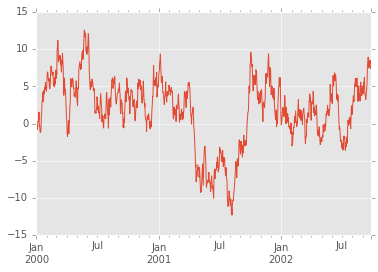

In [159]:
ts.plot() # on a non-fresh start of the notebook, the plot call can throw
# an error NonGuiException. Not sure why, I couldn't repeat the error in
# ipython

Series.plot() is a wrapper for plt.plot(ts) it makes the date formatted axis look nice by not including all the date labels. I may not use this functionality too much (I'll write my own .plot wrapper later) for handling dates since it is a little buggy.

In [160]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index,
                 columns=['A','B','C','D'])

In [161]:
df = df.cumsum()

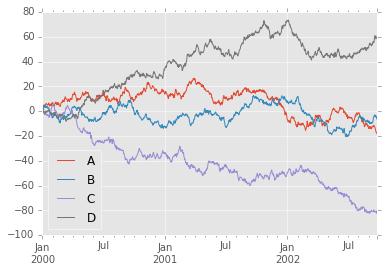

In [162]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In and Out

### CSV

**Writing to a CSV**

In [165]:
df.to_csv('/home/giladmeir/Python/Tutorials/pandas_tutorials/10_min_pandas/foo.csv')

In [166]:
pd.read_csv('/home/giladmeir/Python/Tutorials/pandas_tutorials/10_min_pandas/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.717028,0.489123,-0.579987,0.577652
1,2000-01-02,1.882763,-0.733968,0.974301,-1.138204
2,2000-01-03,3.318320,-0.808996,-0.133515,-0.534213
3,2000-01-04,4.104054,0.487776,0.246599,0.081549
4,2000-01-05,4.049284,3.561481,-0.822352,0.087784
5,2000-01-06,4.977482,4.644773,-0.845746,-1.589379
6,2000-01-07,3.501864,5.067510,-0.245168,-1.968262
7,2000-01-08,3.531293,4.345726,-1.489841,-2.592368
8,2000-01-09,5.099142,3.156915,-2.147103,-2.261042
9,2000-01-10,5.404490,4.412484,-1.859861,-0.710086


### HDF5

Writing to HDF5 Store

In [168]:
df.to_hdf('/home/giladmeir/Python/Tutorials/pandas_tutorials/10_min_pandas/foo.h5','df')

Reading from HDF5 Store

In [169]:
df2 = pd.read_hdf('/home/giladmeir/Python/Tutorials/pandas_tutorials/10_min_pandas/foo.h5','df')

### Excel

Writing to an excel file (booh!!)

In [170]:
df.to_excel('/home/giladmeir/Python/Tutorials/pandas_tutorials/10_min_pandas/foo.xlsx', sheet_name='Sheet1')

In [172]:
df2 = pd.read_excel('/home/giladmeir/Python/Tutorials/pandas_tutorials/10_min_pandas/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])